In [3]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

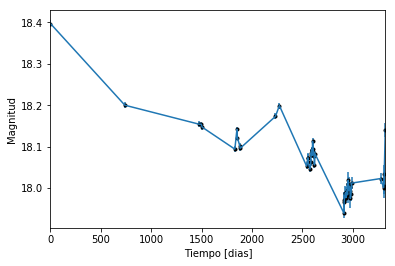

In [16]:
data = np.genfromtxt('LC_2670_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

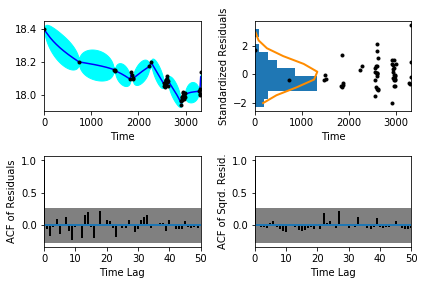

In [7]:
sample.assess_fit()

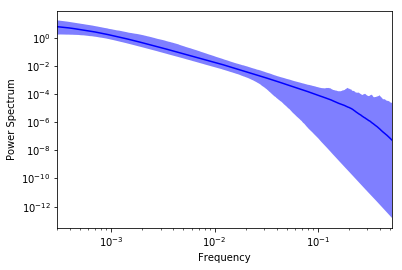

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [12]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0143578,'Medida del nivel de ruido')

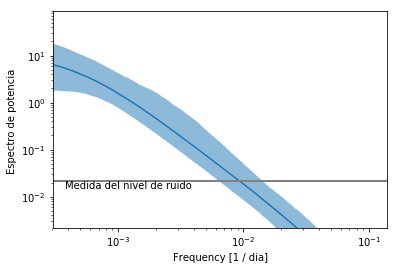

In [14]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

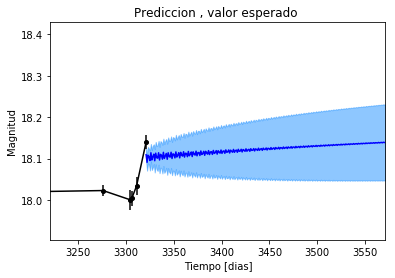

In [17]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

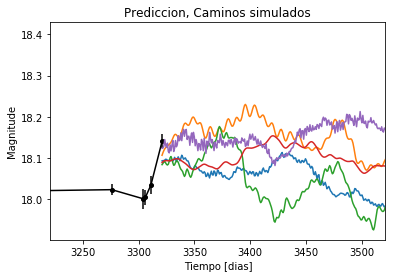

In [18]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

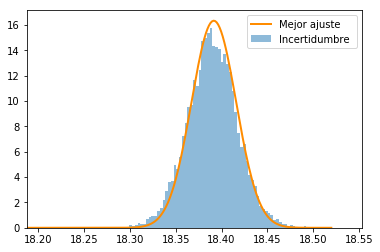

In [20]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

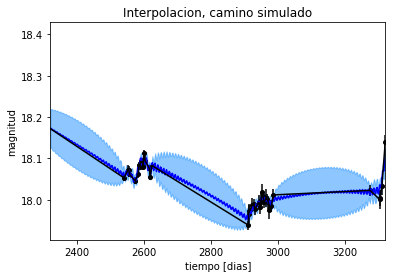

In [21]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

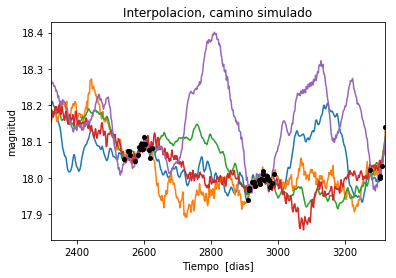

In [22]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [23]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


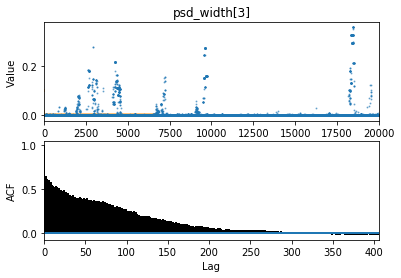

In [39]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 820.2642056
Median: 0.0283902376508
Standard deviation: 0.190272820765
68% credibility interval: [ 0.00279068  0.21596984]
95% credibility interval: [  4.85348682e-04   7.39319231e-01]
99% credibility interval: [  3.18711928e-04   9.87200763e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 924.2458871
Median: 0.0200975413781
Standard deviation: 0.130174970586
68% credibility interval: [ 0.00171615  0.13283801]
95% credibility interval: [  3.67555867e-04   5.09023804e-01]
99% credibility interval: [  3.10845250e-04   7.62245980e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 405.347790799
Median: 0.103711612375
Standa

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [32]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 245.609664736
Median: 0.263353146742
Standard deviation: 0.287944130289
68% credibility interval: [ 0.02592479  0.68948662]
95% credibility interval: [ 0.          0.97575054]
99% credibility interval: [ 0.        1.024667]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 245.609664736
Median: 0.263353146742
Standard deviation: 0.287944130289
68% credibility interval: [ 0.02592479  0.68948662]
95% credibility interval: [ 0.          0.97575054]
99% credibility interval: [ 0.        1.024667]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2055.34980059
Median: 0.0
Standard deviation: 0.000246352523487
68% credibility 

Plotting parameter summary


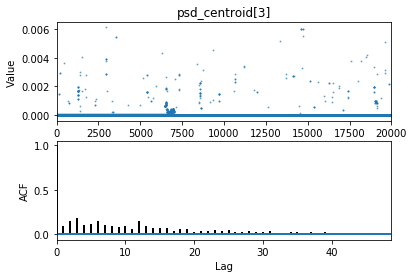

In [44]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [45]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [46]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 904.411382746
Median: 130.202315927
Standard deviation: 1.94962663854
68% credibility interval: [ 128.04493863  131.69256154]
95% credibility interval: [ 125.13173069  132.65807605]
99% credibility interval: [ 122.98246094  132.96414565]


In [52]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [53]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 708.813055347
Median: 1.45561039871
Standard deviation: 2.68936567143
68% credibility interval: [ 0.30277917  5.23153457]
95% credibility interval: [ 0.09040253  9.46070582]
99% credibility interval: [  0.02925272  12.65239341]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 396.829909879
Median: 5.71580956338
Standard deviation: 13.2100638451
68% credibility interval: [  0.92012833  23.76626135]
95% credibility interval: [  0.04550147 

Plotting parameter summary


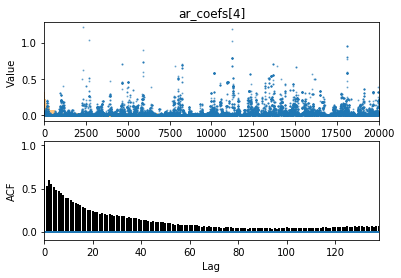

In [61]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [62]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [63]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 520.746586851
Median: 2.25803997131e-32
Standard deviation: 1.69509016255e+87
68% credibility interval: [  5.24613935e-67   1.59693679e-08]
95% credibility interval: [  2.73499516e-96   9.55274712e+16]
99% credibility interval: [  1.73624447e-114   6.55130814e+087]


In [67]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [68]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1251.76307296
Median: 18.1618565382
Standard deviation: 0.0589105069309
68% credibility interval: [ 18.10825805  18.21717094]
95% credibility interval: [ 18.05327139  18.29015477]
99% credibility interval: [ 18.00662147  18.34811594]


Plotting parameter summary


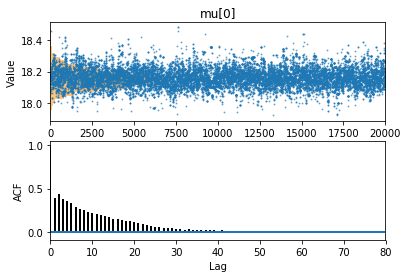

In [71]:
sample.plot_parameter('mu', 0, doShow=True)

In [73]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [74]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 245.609664736
Median: 0.263353146742
Standard deviation: 0.287944130289
68% credibility interval: [ 0.02592479  0.68948662]
95% credibility interval: [ 0.          0.97575054]
99% credibility interval: [ 0.        1.024667]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 245.609664736
Median: 0.263353146742
Standard deviation: 0.287944130289
68% credibility interval: [ 0.02592479  0.68948662]
95% credibility interval: [ 0.          0.97575054]
99% credibility interval: [ 0.        1.024667]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2055.34980059
Median: 0.0
Standard deviation: 0.000246352523487
68% credibility 

Plotting parameter summary


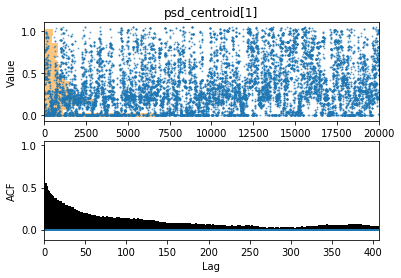

In [82]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [83]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [84]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 904.411382746
Median: 130.202315927
Standard deviation: 1.94962663854
68% credibility interval: [ 128.04493863  131.69256154]
95% credibility interval: [ 125.13173069  132.65807605]
99% credibility interval: [ 122.98246094  132.96414565]


Plotting parameter summary


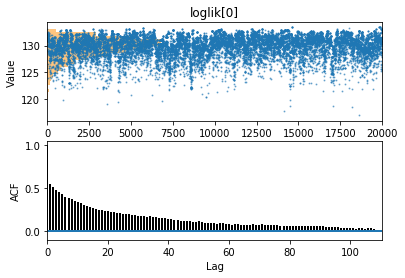

In [86]:
sample.plot_parameter('loglik', 0, doShow=True)

In [87]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [88]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1532.1463126
Median: 0.0135265663589
Standard deviation: 0.0086608696291
68% credibility interval: [ 0.00923405  0.02051196]
95% credibility interval: [ 0.00659056  0.03590204]
99% credibility interval: [ 0.00535939  0.05040461]


Plotting parameter summary


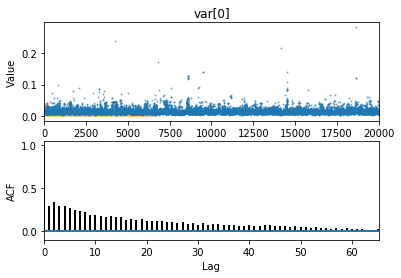

In [89]:
sample.plot_parameter('var', 0, doShow=True)

In [90]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [91]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 402.055253248
Median: 1.04163601691
Standard deviation: 0.22042737273
68% credibility interval: [ 0.85176546  1.29440621]
95% credibility interval: [ 0.70580482  1.54935703]
99% credibility interval: [ 0.6275151   1.76146403]


Plotting parameter summary


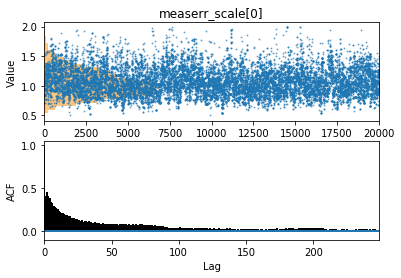

In [92]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [93]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [94]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 593.595258068
Median: 0.020373829875
Standard deviation: 0.217541980094
68% credibility interval: [ 0.00107949  0.18264829]
95% credibility interval: [  2.43722882e-21   7.80283091e-01]
99% credibility interval: [  6.62390488e-90   1.35126917e+00]


Plotting parameter summary


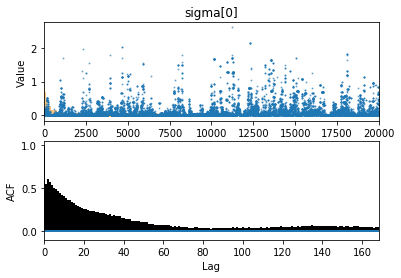

In [95]:
sample.plot_parameter('sigma', 0, doShow=True)

In [96]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [97]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 820.2642056
Median: (-0.178381124075-3.38899293627j)
Standard deviation: 2.16852349676
68% credibility interval: [-1.35697853-1.63815412j -0.01753439-0.82830041j]
95% credibility interval: [ -4.64527973e+00+0.j          -3.04953571e-03-5.08353656j]
99% credibility interval: [ -6.20276533e+00+0.j         -2.00252610e-03-3.8814206j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 924.2458871
Median: (-0.126276576697+3.09606401899j)
Standard deviation: 1.98549993002
68% credibility interval: [-0.83464582+4.32051165j -0.01078287+2.89423499j]
95% credibility interval: [ -3.19829089e+00+3.87497131j  -2.30942162e-03+0.j        ]
99% credibility interval: [ -4.78933274e+00 +2.89185704e+00j  -1.95309831e-03 +1.18211628e-03j]
Po